In [83]:
#Loading the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv('insurance.csv')

In [35]:
#View basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [36]:
#Describing the dataset
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [37]:
#To find dulicate values in the dataset
df.duplicated().sum()

1

In [38]:
#To drop the null values in the dataset
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [39]:
#To find the null values in the dataset
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [15]:
#To view the data set
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [27]:
#To find the unique datatypes
df["age"].unique()

array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34,
       59, 63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64,
       20, 61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39], dtype=int64)

In [28]:
df["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

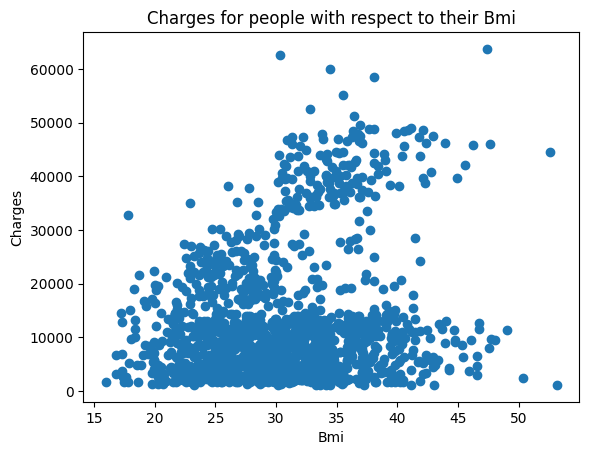

In [60]:
#Linear Regression

bmi_np=df["bmi"].to_numpy()
charges_np=df["charges"].to_numpy()

plt.scatter(bmi_np,charges_np)
plt.xlabel('Bmi')
plt.ylabel('Charges')
plt.title('Charges for people with respect to their Bmi')
plt.show()


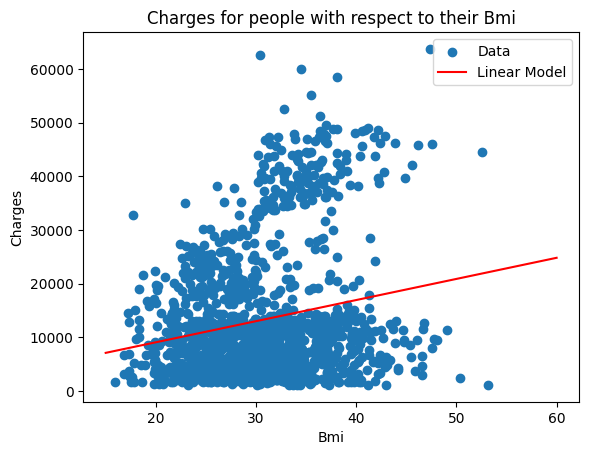

In [74]:

import sklearn
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression().fit(bmi_np.reshape((-1, 1)),charges_np)

dummy_inputs = np.linspace(15, 60)
dummy_predictions = linear_model.predict(dummy_inputs.reshape((-1, 1)))

plt.scatter(bmi_np,charges_np , label='Data')
plt.plot(dummy_inputs, dummy_predictions, label='Linear Model', color='red')
plt.xlabel('Bmi')
plt.ylabel('Charges')
plt.title('Charges for people with respect to their Bmi')
plt.legend()
plt.show()

In [82]:
#CALCULATING MEAN ABSOLUTE ERROR
from sklearn.metrics import mean_absolute_error as MAE

print("MAE =",MAE(linear_model.predict(bmi_np.reshape((-1, 1))),charges_np))



MAE = 9172.351145507564


In [86]:
#Calculating MEAN SQUARED ERROR
from sklearn.metrics import mean_squared_error as MSE

print("MSE =",MSE(linear_model.predict(bmi_np.reshape((-1, 1))), charges_np))

MSE = 140777900.09850758


In [87]:
#Calculating Root Mean Squared Error
print("RMSE =",MSE(linear_model.predict(bmi_np.reshape((-1, 1))),charges_np,squared=False))

RMSE = 11864.986308399499
